# Project Capstone

## Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from io import BytesIO
from ipywidgets import widgets
import zipfile
import shutil

## Download Dataset

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d serenaraju/yawn-eye-dataset-new
!kaggle datasets download -d franciscolozdatasci/csc481-project-dataset

Dataset URL: https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new
License(s): unknown
 91% 147M/161M [00:01<00:00, 107MB/s]
100% 161M/161M [00:01<00:00, 100MB/s]
Dataset URL: https://www.kaggle.com/datasets/franciscolozdatasci/csc481-project-dataset
License(s): unknown
 99% 1.92G/1.93G [00:25<00:00, 80.4MB/s]
100% 1.93G/1.93G [00:25<00:00, 80.8MB/s]


In [ ]:
with zipfile.ZipFile('yawn-eye-dataset-new.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset1')
os.remove('yawn-eye-dataset-new.zip')

with zipfile.ZipFile('csc481-project-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset2')
os.remove('csc481-project-dataset.zip')

## Data Assessment

In [ ]:
new_dataset_path = '/content/new_dataset'
drowsy_path = os.path.join(new_dataset_path, 'Drowsy')
non_drowsy_path = os.path.join(new_dataset_path, 'Non Drowsy')

os.makedirs(drowsy_path, exist_ok=True)
os.makedirs(non_drowsy_path, exist_ok=True)

print("Folder Drowsy dan Non Drowsy telah dibuat.")


Folder Drowsy dan Non Drowsy telah dibuat.


In [ ]:
dataset_path = './dataset1/dataset_new'
dataset2_path = './dataset2/content/dd_dataset'
dataset_final = './new_dataset'

folders_to_move = {
    "train/Closed": "Drowsy",
    "test/Closed": "Drowsy",
    "train/yawn": "Drowsy",
    "test/yawn": "Drowsy",
    "train/Open": "Non Drowsy",
    "test/Open": "Non Drowsy",
    "train/no_yawn": "Non Drowsy",
    "test/no_yawn": "Non Drowsy",
    "Drowsy": "Drowsy",
    "Non Drowsy": "Non Drowsy"
}

for source_folder, target_folder in folders_to_move.items():
    source_path1 = os.path.join(dataset_path, source_folder)
    source_path2 = os.path.join(dataset2_path, source_folder)
    target_path = os.path.join(dataset_final, target_folder)

    if not os.path.exists(target_path):
        os.makedirs(target_path)

    for source_path in [source_path1, source_path2]:
        if os.path.exists(source_path):
            for filename in os.listdir(source_path):
                file_path = os.path.join(source_path, filename)
                if os.path.isfile(file_path):
                    shutil.move(file_path, os.path.join(target_path, filename))
            print(f"Moved files from {source_path} to {target_path}")


Moved files from ./dataset1/dataset_new/train/Closed to ./new_dataset/Drowsy
Moved files from ./dataset1/dataset_new/test/Closed to ./new_dataset/Drowsy
Moved files from ./dataset1/dataset_new/train/yawn to ./new_dataset/Drowsy
Moved files from ./dataset1/dataset_new/test/yawn to ./new_dataset/Drowsy
Moved files from ./dataset1/dataset_new/train/Open to ./new_dataset/Non Drowsy
Moved files from ./dataset1/dataset_new/test/Open to ./new_dataset/Non Drowsy
Moved files from ./dataset1/dataset_new/train/no_yawn to ./new_dataset/Non Drowsy
Moved files from ./dataset1/dataset_new/test/no_yawn to ./new_dataset/Non Drowsy
Moved files from ./dataset2/content/dd_dataset/Drowsy to ./new_dataset/Drowsy
Moved files from ./dataset2/content/dd_dataset/Non Drowsy to ./new_dataset/Non Drowsy


In [ ]:
BASE_DIR = './new_dataset'

drowsy_dir = os.path.join(BASE_DIR, 'Drowsy')
normal_dir = os.path.join(BASE_DIR, 'Non Drowsy')

print(f"There are {len(os.listdir(drowsy_dir))} images of drowsy.")
print(f"There are {len(os.listdir(normal_dir))} images of normal.")

There are 33797 images of drowsy.
There are 30896 images of normal.


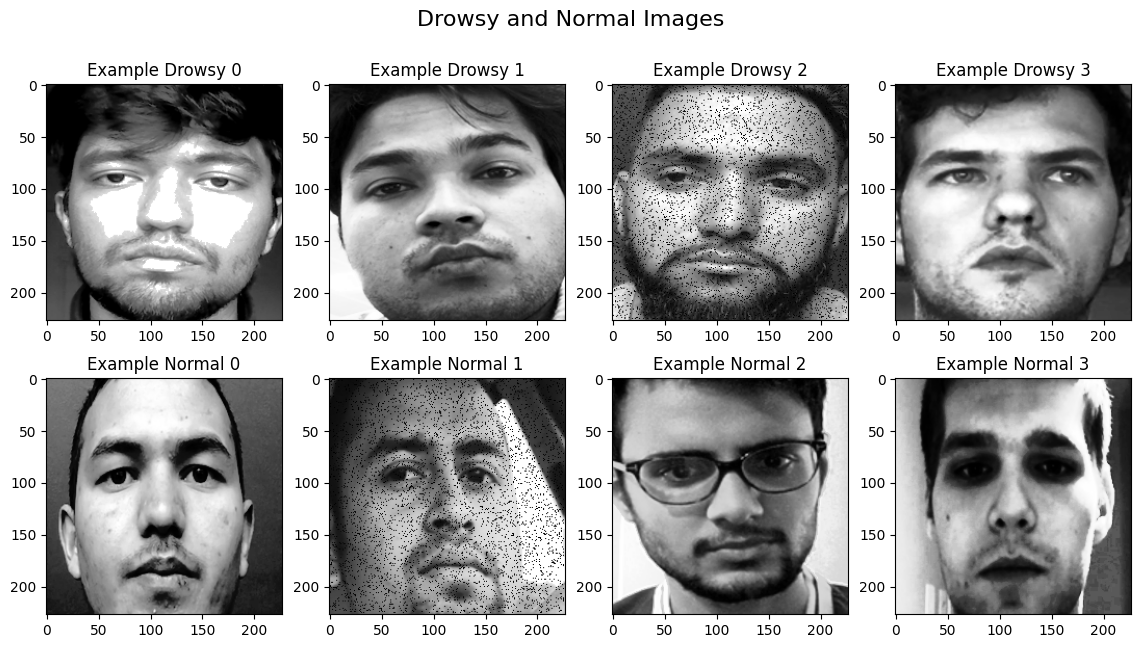

In [ ]:
drowsy_filenames = [os.path.join(drowsy_dir, filename) for filename in os.listdir(drowsy_dir)]
normal_filenames = [os.path.join(normal_dir, filename) for filename in os.listdir(normal_dir)]

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('Drowsy and Normal Images', fontsize=16)

for i, drowsy_image in enumerate(drowsy_filenames[:4]):
    img = tf.keras.utils.load_img(drowsy_image)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Example Drowsy {i}')

for i, normal_image in enumerate(normal_filenames[:4]):
    img = tf.keras.utils.load_img(normal_image)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Example Normal {i}')

plt.show()

In [ ]:
def train_val_datasets():
    training_dataset = tf.keras.utils.image_dataset_from_directory (
        directory = BASE_DIR,
        image_size = (150, 150),
        batch_size = 128,
        label_mode = 'binary',
        validation_split = 0.15,
        subset = 'training',
        seed = 42
    )
    validation_dataset = tf.keras.utils.image_dataset_from_directory (
        directory = BASE_DIR,
        image_size = (150, 150),
        batch_size = 128,
        label_mode = 'binary',
        validation_split = 0.15,
        subset = 'validation',
        seed = 42
    )

    return training_dataset, validation_dataset

In [ ]:
training_dataset, validation_dataset = train_val_datasets()

Found 64693 files belonging to 2 classes.
Using 54990 files for training.
Found 64693 files belonging to 2 classes.
Using 9703 files for validation.


In [ ]:
for images, labels in training_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

Maximum pixel value of images: 255.0

Shape of batch of images: (128, 150, 150, 3)
Shape of batch of labels: (128, 1)


In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
		tf.keras.layers.Input(shape=(150, 150, 3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
model = create_model()

In [ ]:
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (128, 1)


In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.98 and logs['val_accuracy'] >= 0.98:
            self.model.stop_training = True

            print("\nReached 98% train accuracy and 98% validation accuracy, so cancelling training!")

In [ ]:
history = model.fit(
	training_dataset,
	epochs = 50,
	validation_data = validation_dataset,
	callbacks = [EarlyStoppingCallback()]
)

Epoch 1/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 2705s 6s/step - accuracy: 0.8768 - loss: 0.2589 - val_accuracy: 0.9900 - val_loss: 0.0265
Epoch 2/50
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9910 - loss: 0.0221
Reached 98% train accuracy and 98% validation accuracy, so cancelling training!
430/430 ━━━━━━━━━━━━━━━━━━━━ 2732s 6s/step - accuracy: 0.9910 - loss: 0.0221 - val_accuracy: 0.9925 - val_loss: 0.0174


## Save Model

In [ ]:
model.save('model_2_fix.h5')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=model_2_fix.

## Load Model

In [ ]:
loaded_model = tf.keras.models.load_model('model_2_fix.h5')

In [ ]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)      

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully unins

In [ ]:
!tensorflowjs_converter --input_format=keras model_2_fix.h5 ./

2024-12-10 13:48:59.453585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733838539.473991   26012 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733838539.480080   26012 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!


In [ ]:
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = loaded_model.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')

        if prediction > 0.5:
            print(filename + " is a normal")
        else:
            print(filename + " is a drowsy")


def on_upload_change(change):
    for name, file_info in change.new.items(): # Access file info using dictionary keys
        file_jpgdata = BytesIO(file_info['content'])  # Get content from file_info dictionary
        file_predict(name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()